In [ ]:
!pip install pandas 
!pip install numpy 

# **DATA PREPROCESSING**

In [ ]:
import pandas as pd 
import numpy as np
df = pd.read_csv('/content/insurance.csv')
print(df.to_string)

<bound method DataFrame.to_string of       age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns]>


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [ ]:
print(df['sex'].value_counts())
print(df['smoker'].value_counts(),df['region'].value_counts())

male      676
female    662
Name: sex, dtype: int64
no     1064
yes     274
Name: smoker, dtype: int64 southeast    364
northwest    325
southwest    325
northeast    324
Name: region, dtype: int64


In [ ]:
x = df.iloc[:,:-1].values
y = df.iloc[:,-1].values
y_conc = y.copy()

print(x)
print(y)

[[19 'female' 27.9 0 'yes' 'southwest']
 [18 'male' 33.77 1 'no' 'southeast']
 [28 'male' 33.0 3 'no' 'southeast']
 ...
 [18 'female' 36.85 0 'no' 'southeast']
 [21 'female' 25.8 0 'no' 'southwest']
 [61 'female' 29.07 0 'yes' 'northwest']]
[16884.924   1725.5523  4449.462  ...  1629.8335  2007.945  29141.3603]


In [ ]:
!pip install scikit-learn

In [ ]:
from sklearn.preprocessing import LabelEncoder

labelencoder = LabelEncoder()

x[:, 1] = labelencoder.fit_transform(x[:, 1])
x[:, 4] = labelencoder.fit_transform(x[:, 4])
x[:, 5] = labelencoder.fit_transform(x[:, 5])
print(x[:, 1])
print(x[:, 4])
print(x[:, 5])
# print(x)
df1 = pd.DataFrame(x)
print(df1.to_string)
print(y)


[0 1 1 ... 0 0 0]
[1 0 0 ... 0 0 1]
[3 2 2 ... 2 3 1]
<bound method DataFrame.to_string of        0  1       2  3  4  5
0     19  0    27.9  0  1  3
1     18  1   33.77  1  0  2
2     28  1      33  3  0  2
3     33  1  22.705  0  0  1
4     32  1   28.88  0  0  1
...   .. ..     ... .. .. ..
1333  50  1   30.97  3  0  1
1334  18  0   31.92  0  0  0
1335  18  0   36.85  0  0  2
1336  21  0    25.8  0  0  3
1337  61  0   29.07  0  1  1

[1338 rows x 6 columns]>
[16884.924   1725.5523  4449.462  ...  1629.8335  2007.945  29141.3603]


# **MODEL SELECTION**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train,x_test,y_train,y_test=train_test_split(x,y ,test_size = 0.25 ,random_state = 1)
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)
# print(x_train)
# print(x_test)

# x_train,x_test,y_train,y_test=train_test_split(x,y ,test_size = 0.25 ,random_state = 1)
rfr = RandomForestRegressor(n_estimators = 49 , random_state = 0)
rfr.fit(x_train,y_train)
predictions = rfr.predict(x_test)
# print(y_test)
print("TRAINING SET PREDICTION SCORE :",rfr.score(x_train, y_train))
print("TESTING SET PREDICTION SCORE  :",rfr.score(x_test, y_test))

sample_id = 11
print('ACTUAL CHARGES                : %.2f' % y_test[sample_id])
# print('Linear Regression Prediction : %.2f' % lr_predict[sample_id])
print('RANDOM FOREST PREDICTION      : %.2f' % predictions[sample_id])


TRAINING SET PREDICTION SCORE : 0.9757867485085552
TESTING SET PREDICTION SCORE  : 0.8303030611618449
ACTUAL CHARGES                : 11538.42
RANDOM FOREST PREDICTION      : 12731.50


# **MODEL EVALUATION**

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
import math
# Evaluate prediction model using MSE
rf_mse = mean_squared_error(y_test, predictions)
print('RMSE-Random Forest : %.2f (square-rooted)' % math.sqrt(rf_mse))
# Evaluate prediction model using R2-Score
rf_r2 = r2_score(y_test, predictions)
print('R2-Random Forest   : %.2f' % rf_r2)
# Evaluate prediction model using MSE
rf_mse = mean_squared_error(y_test, predictions)
print('MSE-Random Forest  : %.2f ' % (rf_mse))

RMSE-Random Forest : 4777.75 (square-rooted)
R2-Random Forest   : 0.83
MSE-Random Forest  : 22826857.22 


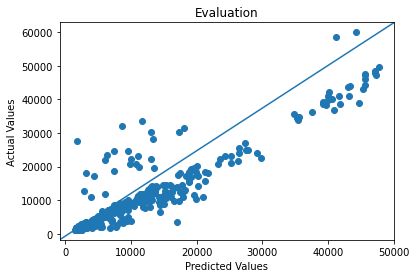

In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.plot([0,1],[0,1], transform=ax.transAxes)
plt.scatter(predictions, y_test)
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")
plt.title("Evaluation")
plt.show()

# **PCA(PRINCIPAL COMPONENT ANALYSIS)**

TRAINING PREDICTION SCORE : 0.9662946235047881
TESTING PREDICTION SCORE  : 0.8405729935224402


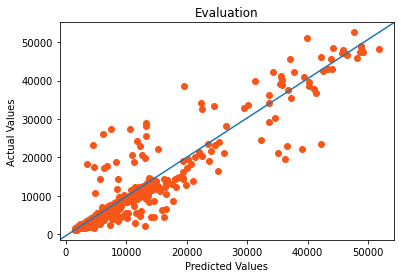

RMSE-RANDOM FOREST : 5009.92 (square-rooted)
R2-RANDOM FOREST   : 0.84
MSE-RANDOM FOREST  : 25099313.09 


In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
import math

scaled_data = sc.fit_transform(df1)
pca = PCA(n_components=5)
pca.fit(scaled_data)
x_pca = pca.transform(scaled_data)
ev = pca.explained_variance_ratio_
# print(ev)
# print(sum(ev*100))
# print(scaled_data.shape)
# print(x_pca.shape)
x_data = x_pca
y_data = y
X_train,X_test,Y_train,Y_test = train_test_split(x_data,y_data,test_size=0.25,random_state=0)
rfr.fit(X_train,Y_train)
temp=rfr.predict(X_test)
print("TRAINING PREDICTION SCORE :",rfr.score(X_train, Y_train))
print("TESTING PREDICTION SCORE  :",rfr.score(X_test, Y_test))
fig, ax = plt.subplots()
ax.plot([0,1],[0,1], transform=ax.transAxes)
plt.scatter(temp, Y_test,c = '#F85518')
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")
plt.title("Evaluation")
plt.show()
# Evaluate prediction model using MSE
rf_mse = mean_squared_error(Y_test, temp)
print('RMSE-RANDOM FOREST : %.2f (square-rooted)' % math.sqrt(rf_mse))
# Evaluate prediction model using R2-Score
rf_r2 = r2_score(Y_test, temp)
print('R2-RANDOM FOREST   : %.2f' % rf_r2)
# Evaluate prediction model using MSE
rf_mse = mean_squared_error(Y_test, temp)
print('MSE-RANDOM FOREST  : %.2f ' % (rf_mse))